In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/charTrainset.zip'

Archive:  /content/gdrive/MyDrive/charTrainset.zip
   creating: charTrainset/
   creating: charTrainset/0/
  inflating: charTrainset/0/46304_5.jpg  
  inflating: charTrainset/0/46314_8.jpg  
  inflating: charTrainset/0/46325_6.jpg  
  inflating: charTrainset/0/46326_5.jpg  
  inflating: charTrainset/0/46355_3.jpg  
  inflating: charTrainset/0/46367_4.jpg  
  inflating: charTrainset/0/46368_3.jpg  
  inflating: charTrainset/0/46369_8.jpg  
  inflating: charTrainset/0/46373_4.jpg  
  inflating: charTrainset/0/46378_2.jpg  
  inflating: charTrainset/0/46410_2.jpg  
  inflating: charTrainset/0/46410_4.jpg  
  inflating: charTrainset/0/46454_6.jpg  
  inflating: charTrainset/0/46468_4.jpg  
  inflating: charTrainset/0/46505_7.jpg  
  inflating: charTrainset/0/46512_4.jpg  
  inflating: charTrainset/0/46513_2.jpg  
  inflating: charTrainset/0/46513_8.jpg  
  inflating: charTrainset/0/46514_4.jpg  
  inflating: charTrainset/0/46527_8.jpg  
  inflating: charTrainset/0/46538_2.jpg  
  inflating

In [ ]:
import os
import cv2 as cv

In [ ]:
!mkdir '/content/data'
!mkdir '/content/data/images'

os.listdir('charTrainset')

dir_images = '/content/charTrainset'
dir_new_imgs = '/content/data/images'

for label in os.listdir('charTrainset'):
    if not os.path.isdir(os.path.join(dir_new_imgs, label)):
        os.mkdir(os.path.join(dir_new_imgs, label))

for label in os.listdir(dir_images):
    dir_sub = os.path.join(dir_images, label)
    for filename in os.listdir(dir_sub):
        img = cv.imread(os.path.join(dir_sub, filename))
        img_square_size = max(img.shape)
        pad_hoz = (img_square_size - img.shape[1]) // 2
        pad_ver = (img_square_size - img.shape[0]) // 2

        crop_img = cv.copyMakeBorder(img, pad_ver, pad_ver, pad_hoz, pad_hoz, cv.BORDER_CONSTANT)
        crop_img = cv.resize(crop_img, (28, 28))
        # crop_img = cv.cvtColor(crop_img, cv.COLOR_BGR2GRAY)
        cv.imwrite(os.path.join(dir_new_imgs, label, filename), crop_img)

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Add a noise data
!mkdir '/content/data/images/Background'

blank_img = np.zeros((28, 28))
for i in range(21):
    noise_img = np.copy(blank_img)
    noise_img[:, np.random.randint(low=6, high=15):np.random.randint(low=14, high=20)] = 255.0
    noise_img = [cv.GaussianBlur(noise_img, (0, 0), 1), cv.medianBlur(noise_img, 1), cv.blur(noise_img, (3, 3))]
    noise_img = noise_img[np.random.choice(range(3))]
    cv.imwrite(f'/content/data/images/Background/{i}.jpg', noise_img)

In [ ]:
X = []
y = []

for label in os.listdir(dir_new_imgs):
    dir_sub = os.path.join(dir_new_imgs, label)
    for filename in os.listdir(dir_sub):
        img = cv.imread(os.path.join(dir_sub, filename))
        processed_img = np.sum(img, axis=2)
        X.append(processed_img)
        y.append(label)

In [ ]:
X_flatten = [x.flatten() for x in X]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, train_size=0.8, test_size=0.2, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

grid_search_model = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1_macro')
grid_search_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [ ]:
grid_search_model.best_params_

{'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
model = grid_search_model.best_estimator_

In [ ]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.9017875022151338

<Figure size 1500x1500 with 0 Axes>

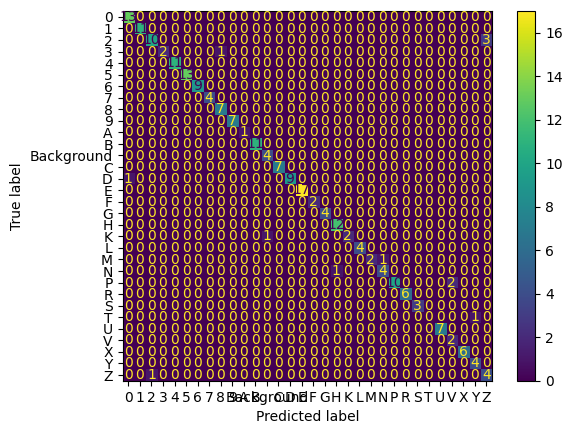

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'gdrive/MyDrive/character_classification.pkl')

['gdrive/MyDrive/character_classification.pkl']